In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [14]:
# Read the CSV file
df = pd.read_csv("C:\\Users\\Admin\\survey_data.csv")

# Display the first few rows of the data
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


In [6]:
import sqlite3

# Create a connection to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Write the dataframe to the SQLite database
df.to_sql('main', conn, if_exists='replace', index=False)


# Close the connection
conn.close()

In [7]:
# Reconnect to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Run a simple query to check the data
QUERY = "SELECT * FROM main LIMIT 5"
df_check = pd.read_sql_query(QUERY, conn)

# Display the results
print(df_check)

   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time       None  Apples   
4   Student, full-time       None  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                               None   
4                                 

In [8]:
QUERY = """
SELECT COUNT(*) 
FROM main
"""
df = pd.read_sql_query(QUERY, conn)
df.head()


,COUNT(*)
0,65437


In [9]:
QUERY = """
SELECT name as Table_Name FROM sqlite_master 
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)



,Table_Name
0,main


In [10]:
QUERY = """
SELECT Age, COUNT(*) as count
FROM main
GROUP BY Age
ORDER BY Age
"""
pd.read_sql_query(QUERY, conn)


,Age,count
0,18-24 years old,14098
1,25-34 years old,23911
2,35-44 years old,14942
3,45-54 years old,6249
4,55-64 years old,2575
5,65 years or older,772
6,Prefer not to say,322
7,Under 18 years old,2568


In [11]:
table_name = 'main'

QUERY = """
SELECT sql FROM sqlite_master 
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY, conn)
print(df.iat[0,0])


CREATE TABLE "main" (
"ResponseId" INTEGER,
  "MainBranch" TEXT,
  "Age" TEXT,
  "Employment" TEXT,
  "RemoteWork" TEXT,
  "Check" TEXT,
  "CodingActivities" TEXT,
  "EdLevel" TEXT,
  "LearnCode" TEXT,
  "LearnCodeOnline" TEXT,
  "TechDoc" TEXT,
  "YearsCode" TEXT,
  "YearsCodePro" TEXT,
  "DevType" TEXT,
  "OrgSize" TEXT,
  "PurchaseInfluence" TEXT,
  "BuyNewTool" TEXT,
  "BuildvsBuy" TEXT,
  "TechEndorse" TEXT,
  "Country" TEXT,
  "Currency" TEXT,
  "CompTotal" REAL,
  "LanguageHaveWorkedWith" TEXT,
  "LanguageWantToWorkWith" TEXT,
  "LanguageAdmired" TEXT,
  "DatabaseHaveWorkedWith" TEXT,
  "DatabaseWantToWorkWith" TEXT,
  "DatabaseAdmired" TEXT,
  "PlatformHaveWorkedWith" TEXT,
  "PlatformWantToWorkWith" TEXT,
  "PlatformAdmired" TEXT,
  "WebframeHaveWorkedWith" TEXT,
  "WebframeWantToWorkWith" TEXT,
  "WebframeAdmired" TEXT,
  "EmbeddedHaveWorkedWith" TEXT,
  "EmbeddedWantToWorkWith" TEXT,
  "EmbeddedAdmired" TEXT,
  "MiscTechHaveWorkedWith" TEXT,
  "MiscTechWantToWorkWith" TEXT,


In [15]:
print(df.columns)


Index(['ResponseId', 'MainBranch', 'Age', 'Employment', 'RemoteWork', 'Check',
       'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       ...
       'JobSatPoints_6', 'JobSatPoints_7', 'JobSatPoints_8', 'JobSatPoints_9',
       'JobSatPoints_10', 'JobSatPoints_11', 'SurveyLength', 'SurveyEase',
       'ConvertedCompYearly', 'JobSat'],
      dtype='object', length=114)


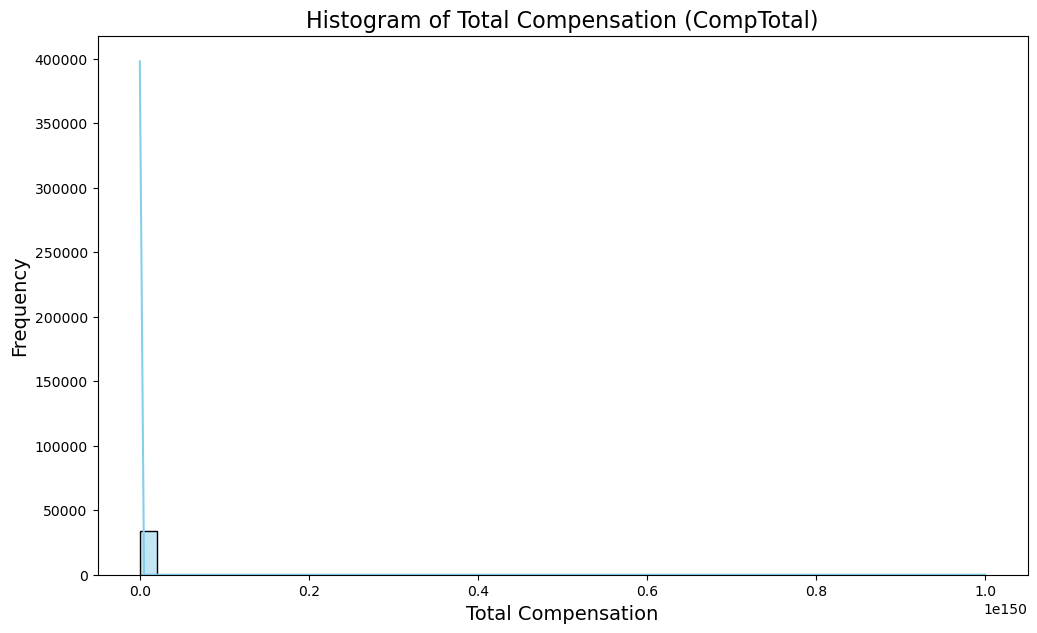

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Check if 'CompTotal' exists in the DataFrame
if 'CompTotal' in df.columns:
    # Clean the data by removing NaN or infinite values
    df_cleaned = df[df['CompTotal'].notna()]
    df_cleaned = df_cleaned[df_cleaned['CompTotal'] != np.inf]
    
    # Plotting the histogram for 'CompTotal'
    plt.figure(figsize=(12, 7))

    # Use a logarithmic transformation if necessary to visualize the distribution better
    if df_cleaned['CompTotal'].min() > 0:
        sns.histplot(np.log(df_cleaned['CompTotal']), kde=True, bins=50, color='skyblue')
        plt.xlabel('Log of Total Compensation', fontsize=14)
    else:
        sns.histplot(df_cleaned['CompTotal'], kde=True, bins=50, color='skyblue')
        plt.xlabel('Total Compensation', fontsize=14)
    
    # Adding title and labels
    plt.title('Histogram of Total Compensation (CompTotal)', fontsize=16)
    plt.ylabel('Frequency', fontsize=14)
    
    # Display the plot
    plt.show()
else:
    print("The 'CompTotal' column does not exist in the dataset.")


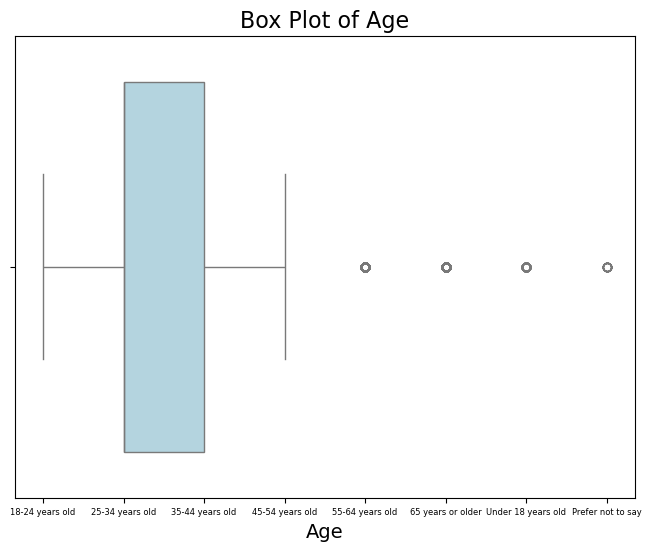

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the box plot for the 'Age' column with a different color
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_cleaned, x='Age', color='lightblue')  # Changed color to lightblue

# Adding labels and title
plt.title('Box Plot of Age', fontsize=16)
plt.xlabel('Age', fontsize=14)

# Rotate the x-axis labels to avoid overlap
plt.xticks(fontsize=6)  # Rotate x-axis labels by 45 degrees

# Display the plot
plt.show()


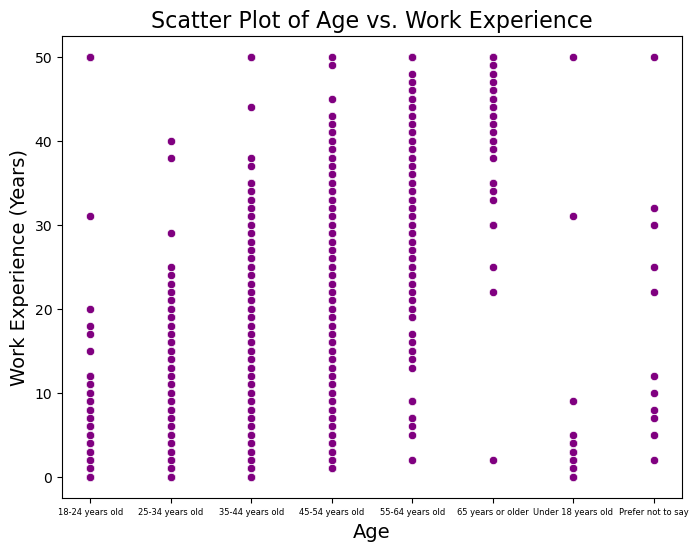

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the scatter plot for Age and WorkExp
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_cleaned, x='Age', y='WorkExp', color='purple')

# Adding labels and title
plt.title('Scatter Plot of Age vs. Work Experience', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Work Experience (Years)', fontsize=14)

# Rotate x-axis labels to prevent overlap
plt.xticks(fontsize=6)

# Display the plot
plt.show()


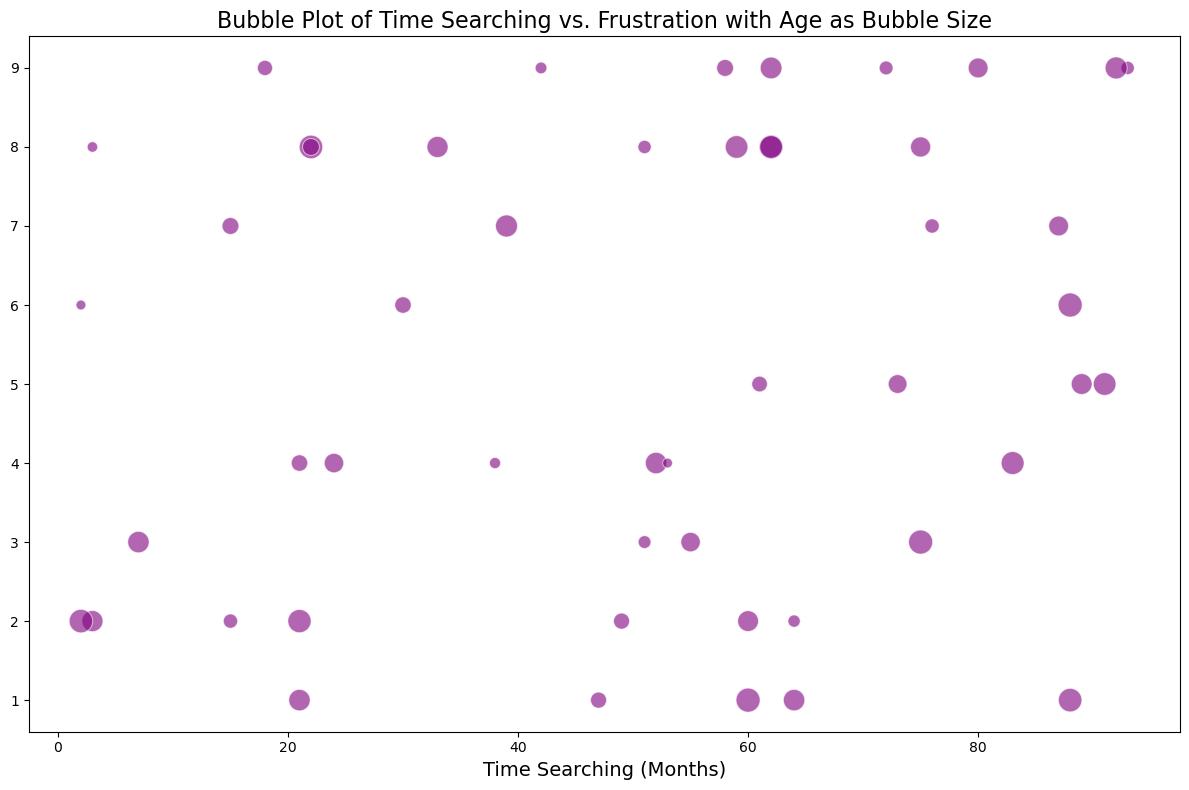

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Creating a sample dataset with random values for demonstration
np.random.seed(42)
data = {
    'TimeSearching': np.random.randint(1, 100, size=50),  # Time spent searching for a job in months
    'Frustration': np.random.randint(1, 10, size=50),  # Frustration level on a scale of 1-10
    'Age': np.random.randint(22, 60, size=50),  # Age of individuals
}

df = pd.DataFrame(data)

# Plotting the bubble plot for TimeSearching and Frustration, with Age as the bubble size
plt.figure(figsize=(12, 8))  # Adjusted figure size for better visibility
sns.scatterplot(data=df, x='TimeSearching', y='Frustration', 
                size='Age', sizes=(50, 300), color='purple', alpha=0.6, legend=None)

# Adding title and x-axis label
plt.title('Bubble Plot of Time Searching vs. Frustration with Age as Bubble Size', fontsize=16)
plt.xlabel('Time Searching (Months)', fontsize=14)

# Removing y-axis label and values
plt.ylabel('')

# Display the plot
plt.tight_layout()  # Ensure the layout fits well
plt.show()


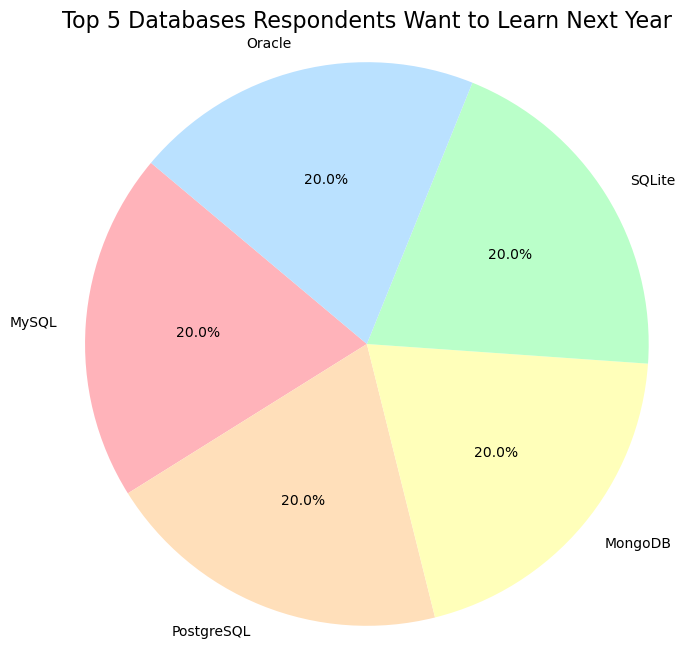

In [52]:
import matplotlib.pyplot as plt
import pandas as pd

# Sample dataset for demonstration (Replace with your actual dataset)
data = {
    'DatabaseWantToWorkWith': ['MySQL', 'PostgreSQL', 'MongoDB', 'SQLite', 'Oracle', 'MySQL', 
                               'PostgreSQL', 'MongoDB', 'SQLite', 'Oracle', 'MySQL', 'PostgreSQL', 
                               'MongoDB', 'SQLite', 'Oracle', 'MySQL', 'PostgreSQL', 'MongoDB', 
                               'SQLite', 'Oracle', 'MySQL', 'PostgreSQL', 'MongoDB', 'SQLite', 
                               'Oracle', 'MySQL', 'PostgreSQL', 'MongoDB', 'SQLite', 'Oracle']
}

# Create DataFrame
df = pd.DataFrame(data)

# Count the occurrences of each database and get the top 5
top_databases = df['DatabaseWantToWorkWith'].value_counts().nlargest(5)

# Plotting the pie chart
plt.figure(figsize=(8, 8))  # Adjust the figure size
colors = ['#FFB3BA', '#FFDFBA', '#FFFFBA', '#BAFFC9', '#BAE1FF']  # Lighter pastel colors
plt.pie(top_databases, labels=top_databases.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Top 5 Databases Respondents Want to Learn Next Year', fontsize=16)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


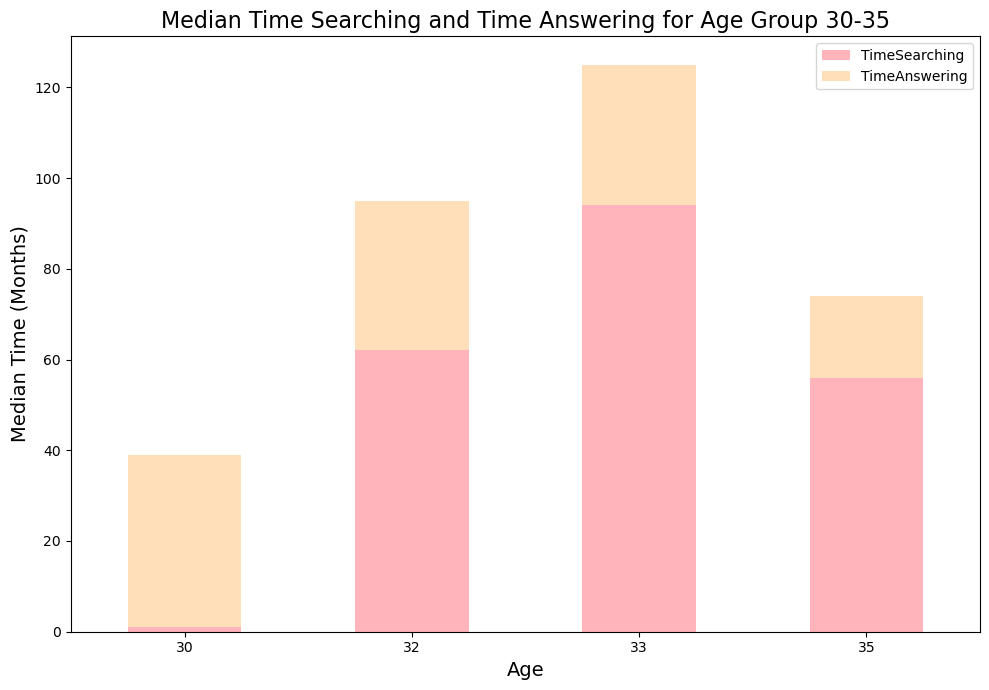

In [53]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Sample dataset for demonstration (Replace with your actual dataset)
data = {
    'TimeSearching': np.random.randint(1, 100, size=50),  # Time spent searching for a job in months
    'TimeAnswering': np.random.randint(1, 50, size=50),  # Time spent answering surveys in months
    'Age': np.random.randint(22, 60, size=50),  # Age of individuals
}

# Create DataFrame
df = pd.DataFrame(data)

# Filter the data for the age group 30 to 35
df_filtered = df[(df['Age'] >= 30) & (df['Age'] <= 35)]

# Calculate the median TimeSearching and TimeAnswering for each unique age in the group
median_values = df_filtered.groupby('Age')[['TimeSearching', 'TimeAnswering']].median()

# Plotting the stacked bar chart
ax = median_values.plot(kind='bar', stacked=True, figsize=(10, 7), color=['#FFB3BA', '#FFDFBA'])

# Adding titles and labels
plt.title('Median Time Searching and Time Answering for Age Group 30-35', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Median Time (Months)', fontsize=14)
plt.xticks(rotation=0)  # Keep the age labels horizontal

# Display the plot
plt.tight_layout()
plt.show()


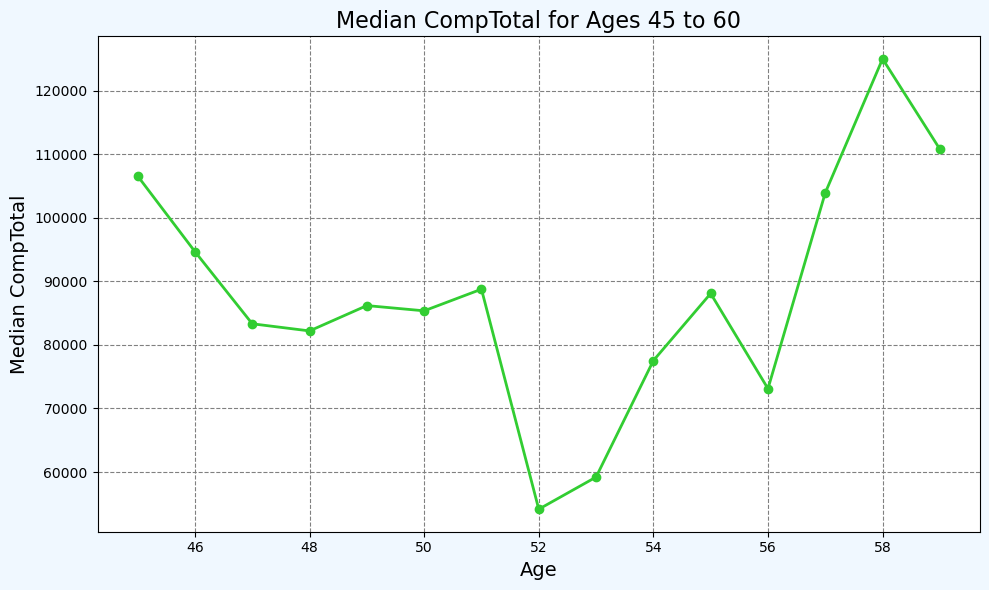

In [56]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Sample dataset for demonstration (Replace with your actual dataset)
data = {
    'CompTotal': np.random.randint(50000, 150000, size=100),  # Total compensation in dollars
    'Age': np.random.randint(22, 60, size=100),  # Age of individuals
}

# Create DataFrame
df = pd.DataFrame(data)

# Filter the data for the age range 45 to 60
df_filtered = df[(df['Age'] >= 45) & (df['Age'] <= 60)]

# Calculate the median CompTotal for each unique age in the range 45 to 60
median_comp_total = df_filtered.groupby('Age')['CompTotal'].median()

# Plotting the line chart
plt.figure(figsize=(10, 6))

# Plot the line with a custom color (e.g., a shade of green)
plt.plot(median_comp_total.index, median_comp_total.values, marker='o', color='#32CD32', linestyle='-', linewidth=2, markersize=6)

# Change the background color of the plot and figure
plt.gcf().set_facecolor('#F0F8FF')  # Light blue background for the entire figure
plt.gca().set_facecolor('#FFFFFF')  # White background for the plot area

# Adding title and labels
plt.title('Median CompTotal for Ages 45 to 60', fontsize=16, color='black')
plt.xlabel('Age', fontsize=14, color='black')
plt.ylabel('Median CompTotal', fontsize=14, color='black')

# Display the plot
plt.grid(True, linestyle='--', color='gray')  # Customize grid appearance
plt.tight_layout()
plt.show()


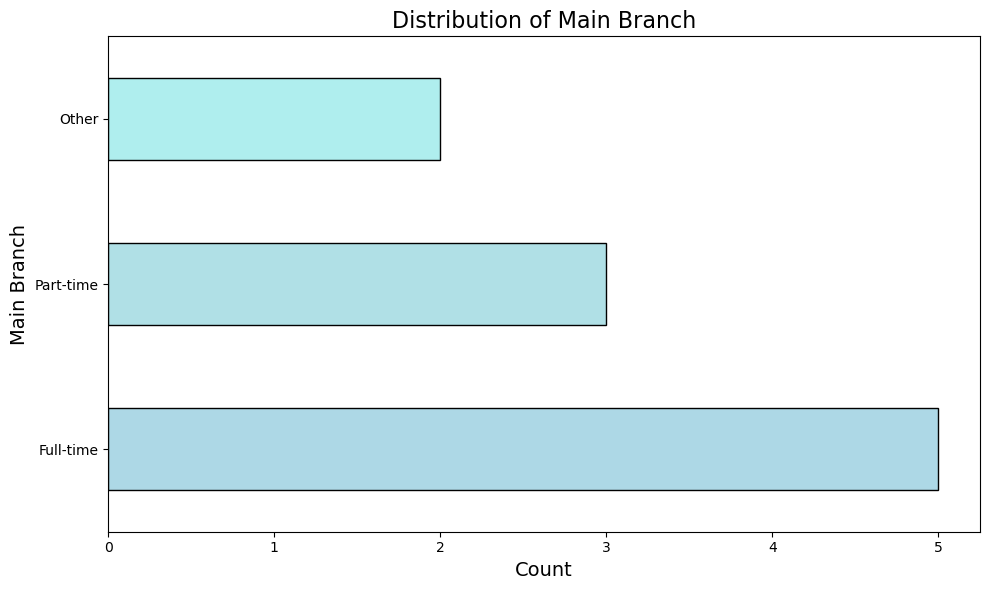

In [59]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Sample dataset for demonstration (Replace with your actual dataset)
data = {
    'MainBranch': ['Full-time', 'Part-time', 'Full-time', 'Part-time', 'Full-time', 'Other', 'Full-time', 'Part-time', 'Other', 'Full-time']
}

# Create DataFrame
df = pd.DataFrame(data)

# Count the occurrences of each category in the 'MainBranch' column
mainbranch_counts = df['MainBranch'].value_counts()

# Define light blue shades
colors = ['#ADD8E6', '#B0E0E6', '#AFEEEE', '#87CEFA']  # Light blue shades

# Plotting the horizontal bar chart with light blue shades
plt.figure(figsize=(10, 6))
mainbranch_counts.plot(kind='barh', color=colors, edgecolor='black')  # Horizontal bar chart with light blue shades

# Adding titles and labels
plt.title('Distribution of Main Branch', fontsize=16)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Main Branch', fontsize=14)

# Display the plot
plt.tight_layout()
plt.show()


In [64]:
import sqlite3

# Establish a connection to the database
conn = sqlite3.connect('my_database.db')
cursor = conn.cursor()

# Perform your database operations
# For example, running a query
cursor.execute("SELECT * FROM my_table")
rows = cursor.fetchall()
for row in rows:
    print(row)

# Ensure to close the cursor and connection
cursor.close()  # Close the cursor
conn.close()    # Close the database connection


In [62]:
# Create a table if it doesn't exist
cursor.execute('''
    CREATE TABLE IF NOT EXISTS my_table (
        id INTEGER PRIMARY KEY,
        name TEXT,
        age INTEGER
    )
''')
conn.commit()  # Commit the changes


In [66]:
import sqlite3

# Establish a connection to the database
conn = sqlite3.connect('my_database.db')
cursor = conn.cursor()

# Check the list of tables
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
tables = cursor.fetchall()
print("Tables in the database:", tables)

# If 'my_table' exists, perform the query, otherwise create it
if ('my_table',) not in tables:
    # Create the table if it doesn't exist
    cursor.execute('''
        CREATE TABLE my_table (
            id INTEGER PRIMARY KEY,
            name TEXT,
            age INTEGER
        )
    ''')
    conn.commit()

# Perform your database operations
cursor.execute("SELECT * FROM my_table")
rows = cursor.fetchall()
for row in rows:
    print(row)

# Ensure to close the cursor and connection
cursor.close()
conn.close()


Tables in the database: [('my_table',)]


In [67]:
import sqlite3

# Using 'with' ensures that the connection and cursor are automatically closed
with sqlite3.connect('my_database.db') as conn:
    cursor = conn.cursor()
    
    # Perform your database operations
    cursor.execute("SELECT * FROM my_table")
    rows = cursor.fetchall()
    for row in rows:
        print(row)
    
    # The connection is automatically closed at the end of the 'with' block
